# Ultimate Data Science Challenge

## Part 1
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import packages and data 

import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta

In [7]:
index = pd.read_json(r"C:\Users\Myngoc\Desktop\Data Science\Ultimate Data Science Challenge\logins.json")
index.to_csv(r"C:\Users\Myngoc\Desktop\Data Science\Ultimate Data Science Challenge\logins.csv", index=False)

index.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Only data is the timestamp of the logins

In [9]:
index.shape

(93142, 1)

In [10]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


no missing data

In [13]:
index.describe()

<ipython-input-13-7446d81e7881>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  index.describe()


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [23]:
#aggregate logins into 15 minute intervals with a count for the number of logins in each interval period

index = index.resample('15min', on='login_time').count()
index.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [24]:
index = index.rename(columns ={'login_time':'count'})
index.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5, 0.98, 'Visualization of the raw data aggregated in 15 minute intervals')

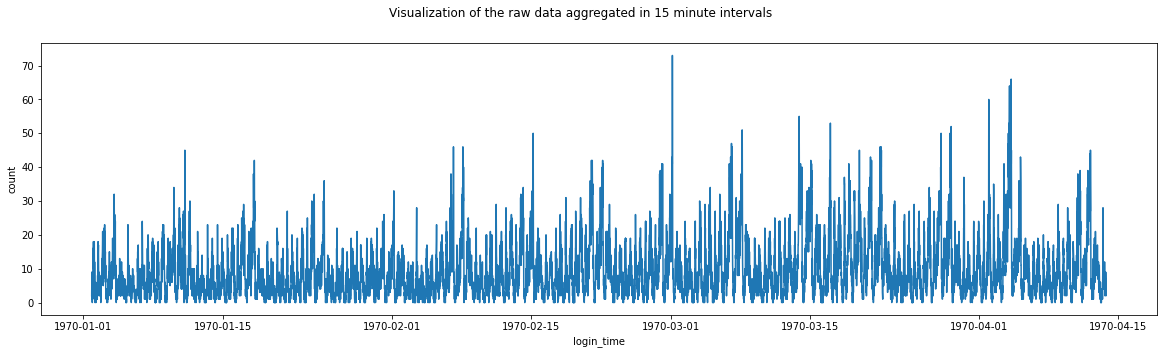

In [25]:
x = index.index
y= index['count']
plt.figure(figsize=(20,5))
sns.lineplot(x=x, y=y)
plt.suptitle('Visualization of the raw data aggregated in 15 minute intervals', size='large')

Login peaks are during the evening times and decrease throughout the day

In [26]:
index['date'] = pd.to_datetime(index.index)

In [33]:
index['month'] = index['date'].dt.month
index['week'] = index['date'].dt.week
index['weekday'] = index['date'].dt.weekday
index['hour'] = index['date'].dt.hour

<ipython-input-33-8e7ac94dff69>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  index['week'] = index['date'].dt.week


In [34]:
index.head()

,count,date,month,week,weekday,hour
login_time,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,3,20
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,3,20
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,3,20
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,3,20
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,3,21


In [35]:
index.describe()

,count,month,week,weekday,hour
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.515938,2.259093,8.325296,3.035554,11.496935
std,8.328818,1.017219,4.215948,2.012722,6.922294
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,5.000000,1.000000,5.000000
50%,7.000000,2.000000,8.000000,3.000000,11.000000
75%,13.000000,3.000000,12.000000,5.000000,17.000000
max,73.000000,4.000000,16.000000,6.000000,23.000000


C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Month')

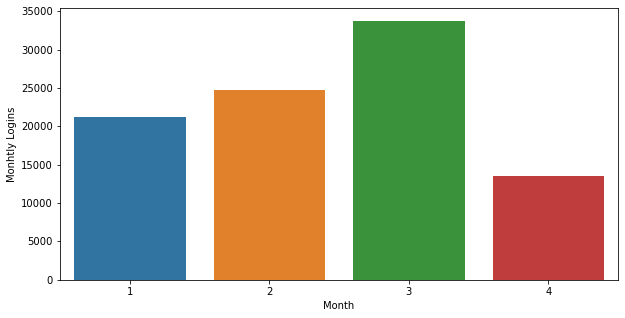

In [46]:
monthly_logins = index.groupby('month')['count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(monthly_logins.index, monthly_logins.values)
plt.ylabel('Monhtly Logins')
plt.xlabel('Month')

March had the highest amount of logins and April had the lowest amount.

C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Week')

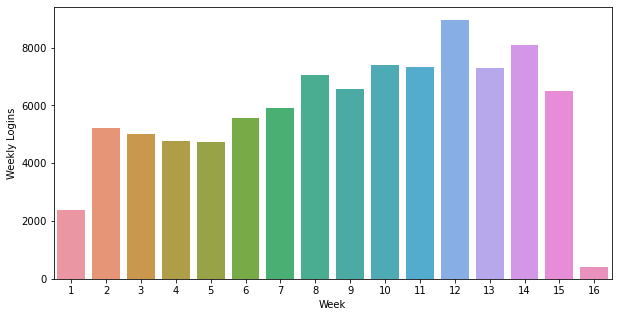

In [38]:
weekly_logins = index.groupby('week')['count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(weekly_logins.index, weekly_logins.values)
plt.ylabel('Weekly Logins')
plt.xlabel('Week')

week 12 had the highest amount of logins and week 16 had the least amount

C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x11ee8d31b20>,
 [Text(0, 0, 'MON'),
  Text(1, 0, 'TUE'),
  Text(2, 0, 'WED'),
  Text(3, 0, 'THU'),
  Text(4, 0, 'FRI'),
  Text(5, 0, 'SAT'),
  Text(6, 0, 'SUN')])

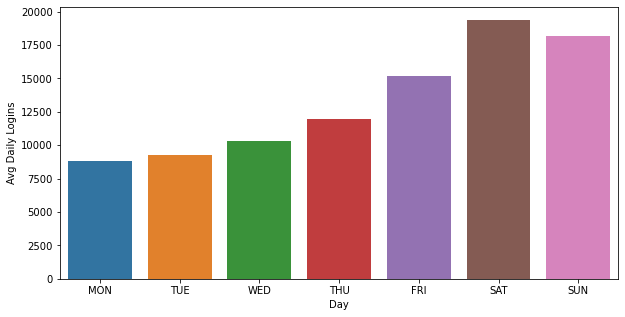

In [48]:
daily_logins = index.groupby('weekday')['count'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(daily_logins.index, daily_logins.values)
plt.ylabel('Avg Daily Logins')
plt.xlabel('Day')

positions = (0, 1, 2, 3, 4, 5, 6)
labels = ("MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN")

plt.xticks(positions, labels)

Saturday has the highest average logins and monday has the lowest

C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Hour')

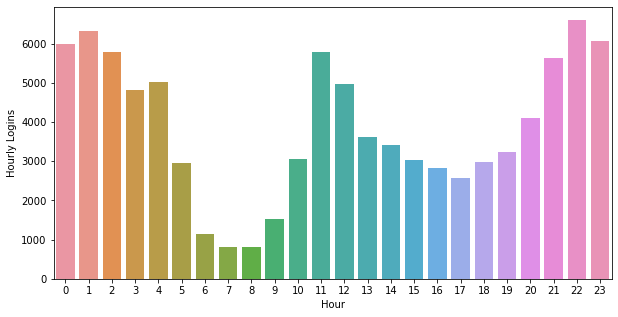

In [50]:
hourly_logins = index.groupby('hour')['count'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(hourly_logins.index, hourly_logins.values)
plt.ylabel('Hourly Logins')
plt.xlabel('Hour')

Hourly chart confirms with the initial 15 minute interval chart that most of the logins occur during the evening time. The peak logins occur at hour 22 (10pm) and after hour 4 (4am) there is a decrease. 

## Part 2
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key metric would be the total reimbursement of the toll cost. The cost can identify if the drivers are actually using the toll bridge to drive across the city. If there is an increase in the reimbursement total, then it shows that drivers are indeed using the toll to go across the 2 cities. If the total is decrease, then the drivers are not using the toll bridge.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
A: how you will implement the experiment
B: what statistical test(s) you will conduct to verify the significance of the observation
C: how you would interpret the results and provide recommendations to the city operations team along with any caveats.


A: Once the total reimbursment of all toll costs data are obtained. Customers can be identified using customer segmentation to find behavioral patterns of those that are more willing to take trips across the 2 cities. The data with other features such as date, time, trip distance, total trip cost, driver rating, rating of trip, and the other features to identify if there are any correlations or patterns with the trips that are taken between the 2 cities.

B: Test of Significance will be used to verify the significance of the observation. The test of significance will test the null hypothesis to either reject or not reject by using the p-value.

C: I will use pairplots and distribution graphs to identify any correlations and patterns among the data. Furthermore, the data can be further analysed based on each feature to determine feature importance.